In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [49]:
# Load the dataset
data = pd.read_csv('data.csv')

In [50]:
# Split the dataset into features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Handle missing values for features
imputer_X = SimpleImputer(strategy='mean')
X = imputer_X.fit_transform(X)

# Handle missing values for labels
imputer_y = SimpleImputer(strategy='most_frequent')
y = imputer_y.fit_transform(y.reshape(-1, 1)).ravel()


In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [54]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Implement KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f'KNN Accuracy: {accuracy_knn}')
print(f'KNN Precision: {precision_knn}')
print(f'KNN Recall: {recall_knn}')
print(f'KNN F1-score: {f1_knn}')

KNN Accuracy: 0.76
KNN Precision: 0.7910795902285264
KNN Recall: 0.76
KNN F1-score: 0.6979900744416874


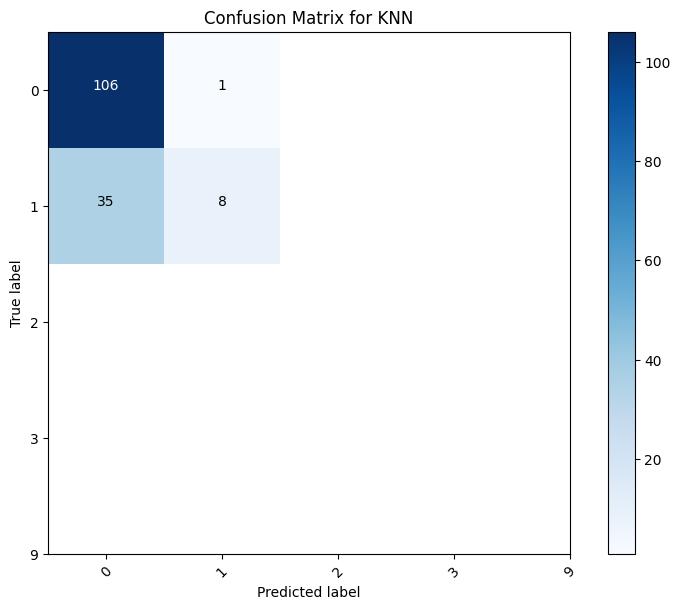

In [64]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, classes=[0, 1, 2, 3, 9], title='Confusion Matrix for KNN')

In [41]:
# Decision Tree (DT)
from sklearn.tree import DecisionTreeClassifier

# Implement Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f'DT Accuracy: {accuracy_dt}')
print(f'DT Precision: {precision_dt}')
print(f'DT Recall: {recall_dt}')
print(f'DT F1-score: {f1_dt}')

DT Accuracy: 0.7533333333333333
DT Precision: 0.7484696969696969
DT Recall: 0.7533333333333333
DT F1-score: 0.7505805711324562


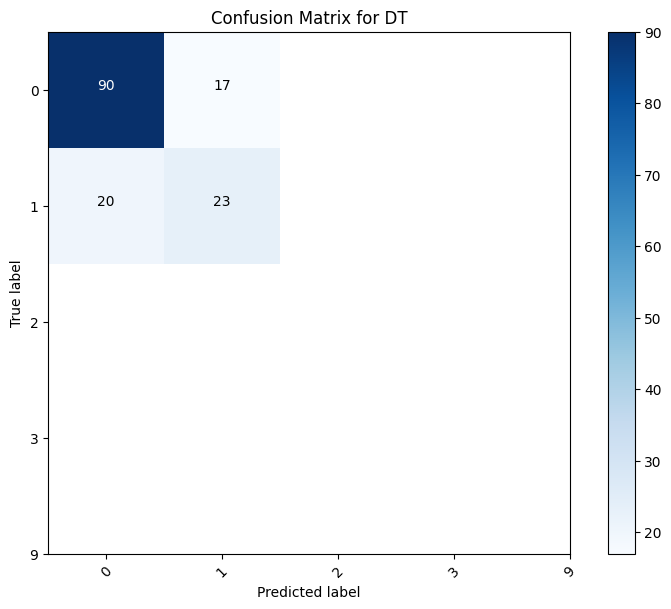

In [65]:
# Confusion Matrix for DT
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, classes=[0, 1, 2, 3, 9], title='Confusion Matrix for DT')


In [42]:
# Multilayer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

# Implement MLP
# Multilayer Perceptron (MLP) with Regularization
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, alpha=0.01, random_state=42)
mlp.fit(X_train, y_train)
# Predict on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print(f'MLP Accuracy: {accuracy_mlp}')
print(f'MLP Precision: {precision_mlp}')
print(f'MLP Recall: {recall_mlp}')
print(f'MLP F1-score: {f1_mlp}')

MLP Accuracy: 0.84
MLP Precision: 0.8424550264550266
MLP Recall: 0.84
MLP F1-score: 0.8410634648370497


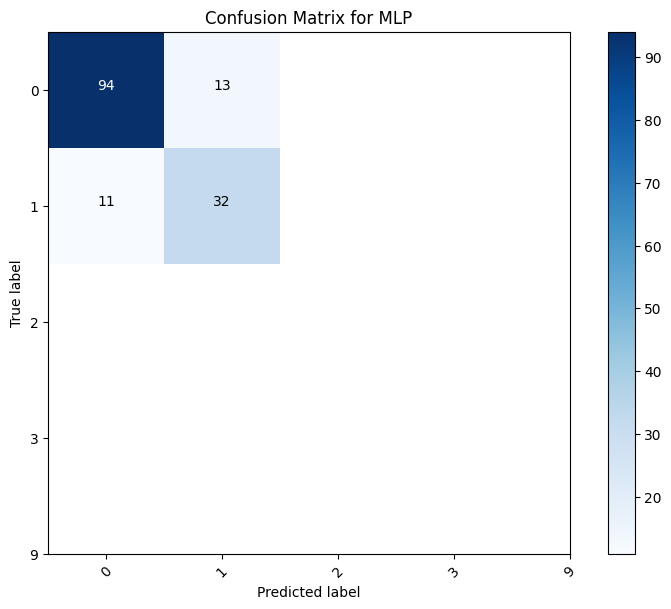

In [66]:
# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plot_confusion_matrix(cm_mlp, classes=[0, 1, 2, 3, 9], title='Confusion Matrix for MLP')


In [43]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation for KNN
knn_cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(f'KNN CV Mean Score: {knn_cv_scores.mean()}')

# K-Fold Cross-Validation for Decision Tree
dt_cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print(f'DT CV Mean Score: {dt_cv_scores.mean()}')

# K-Fold Cross-Validation for MLP
mlp_cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='accuracy')
print(f'MLP CV Mean Score: {mlp_cv_scores.mean()}')

KNN CV Mean Score: 0.7146666666666667
DT CV Mean Score: 0.724


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP CV Mean Score: 0.7093333333333334


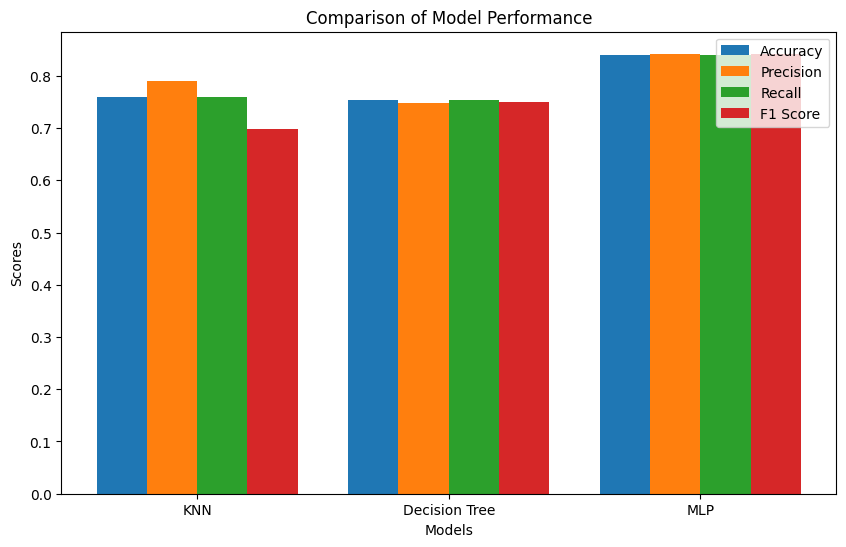

In [67]:
# Compare the models
models = ['KNN', 'Decision Tree', 'MLP']
accuracy_scores = [accuracy_knn, accuracy_dt, accuracy_mlp]
precision_scores = [precision_knn, precision_dt, precision_mlp]
recall_scores = [recall_knn, recall_dt, recall_mlp]
f1_scores = [f1_knn, f1_dt, f1_mlp]

# Plotting the comparison
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, accuracy_scores, width, label='Accuracy')
bar2 = ax.bar(x, precision_scores, width, label='Precision')
bar3 = ax.bar(x + width, recall_scores, width, label='Recall')
bar4 = ax.bar(x + 2 * width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.show()
